# Introduction to Machine Learing with Scikit-Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import sklearn as skl

## Toy Datasets available in the package

The scikit-learn package has datasets available in the library which makes it is easy to practice and learn without needing to load it from the data through a file

In [3]:
import sklearn.datasets

### Example: Breast cancer dataset

We are going to work with a sample dataset which is already available in the package and can be loaded by just calling `load_breast_cancer()` method. It is [available here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic%29). 

In [4]:
cancer = sklearn.datasets.load_breast_cancer()

In [5]:
# IGNORE HOW THE FOLLOWING CODE WORKS BUT CONCENTRATE ON THE HOW THE DATA LOOKS
# Convert the data into a DataFrame

cancer_df = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
cancer_df['Target'] = pd.Series(cancer.target)

cancer_df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
387,13.88,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,...,19.97,99.66,745.3,0.08484,0.12330,0.10910,0.04537,0.2542,0.06623,1
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.029250,0.1473,0.05746,...,28.39,108.10,830.5,0.10890,0.26490,0.37790,0.09594,0.2471,0.07463,1
241,12.42,15.04,78.61,476.5,0.07926,0.03393,0.01053,0.011080,0.1546,0.05754,...,20.37,83.85,543.4,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783,1
211,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.013930,0.1533,0.06057,...,24.99,85.22,546.3,0.12800,0.18800,0.14710,0.06913,0.2535,0.07993,1
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,...,26.14,79.29,459.3,0.11180,0.09708,0.07529,0.06203,0.3267,0.06994,1
441,17.27,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.057360,0.1467,0.05407,...,35.46,132.80,1284.0,0.14360,0.41220,0.50360,0.17390,0.2500,0.07944,0
15,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.073640,0.2303,0.07077,...,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410,0
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.014040,0.2016,0.05977,...,32.04,83.69,489.5,0.13030,0.16960,0.19270,0.07485,0.2965,0.07662,1
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.018670,0.1580,0.06114,...,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151,1
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.027990,0.1811,0.07102,...,22.91,89.61,515.8,0.14500,0.26290,0.24030,0.07370,0.2556,0.09359,1


## Load a dataset

In [6]:
bp_data = pd.read_csv("./data/bp_classific.csv")

In [7]:
bp_data.head()

,age,weight,height,gender,high_bp
0,38.814325,214.961283,77.110968,0.0,0
1,52.588897,103.669248,60.757040,0.0,0
2,65.138359,189.687487,78.861277,0.0,1
3,37.837163,168.971063,69.138766,1.0,1
4,43.587258,189.362424,78.751520,1.0,0


### Pairplot to understand the effect of various features

You can specific the column you want to use for classification (in this case `high_bp`) as `hue` parameter to distinguish between one class to another. 

/Users/jarp/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/jarp/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


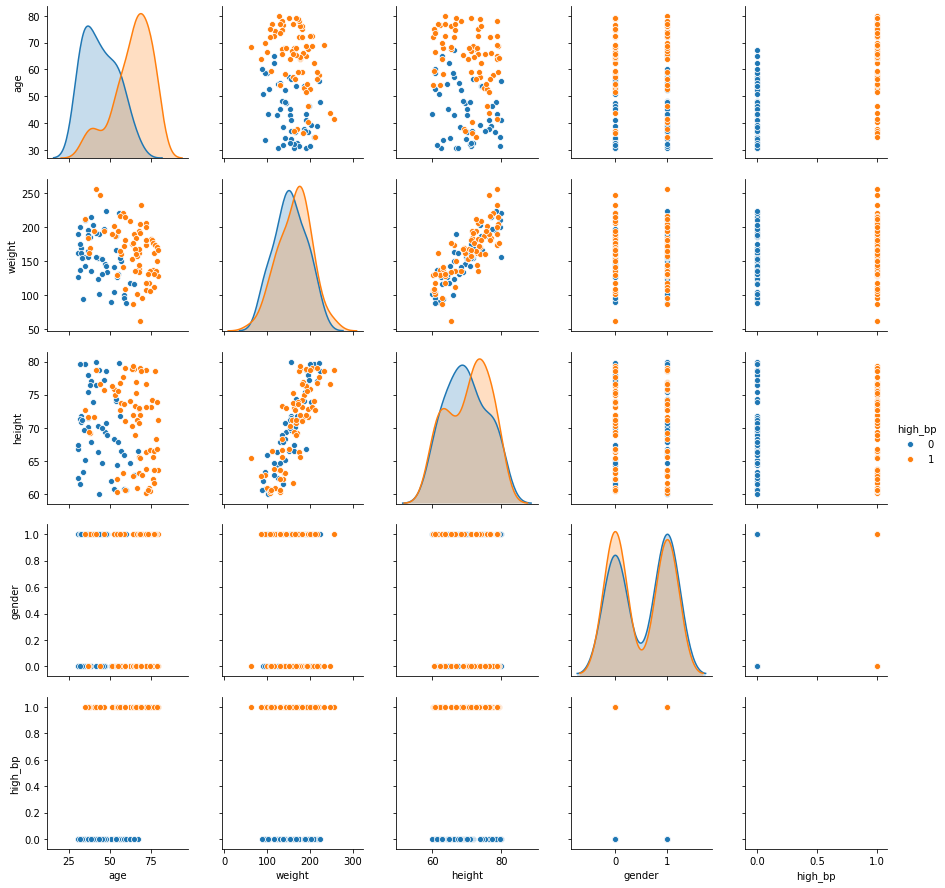

In [8]:
sns.pairplot(bp_data, hue='high_bp')

## Machine Learning: Classfication 

In [9]:
## Split the input features and outcome variable

bp_data_X = bp_data.drop('high_bp', axis = 1)
bp_data_Y = bp_data['high_bp']

In [10]:
bp_data_X.head()

,age,weight,height,gender
0,38.814325,214.961283,77.110968,0.0
1,52.588897,103.669248,60.757040,0.0
2,65.138359,189.687487,78.861277,0.0
3,37.837163,168.971063,69.138766,1.0
4,43.587258,189.362424,78.751520,1.0


In [11]:
bp_data_Y.head()

0    0
1    0
2    1
3    1
4    0
Name: high_bp, dtype: int64

### `train_test_split()`: Method to split the data into train and test

We usually split the data into training set to learn a classifier and then a test set to validate how good our model is 

Important parameters to this method

* **random_state**: Seed to used by randomizer to randomly split the data
* **train_size**: Use float to specify what fraction to use for training. Usually 0.75

In [12]:
from sklearn.model_selection import train_test_split

bp_train_X, bp_test_X, bp_train_Y, bp_test_Y = train_test_split(
    bp_data_X, bp_data_Y, 
    random_state=42, 
    train_size = 0.75)

In [13]:
print(len(bp_data_X), len(bp_train_X), len(bp_test_X))

120 90 30


### Learn a classifier

In [14]:
# There are many classifiers...
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(bp_train_X, bp_train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predict on test data

In [15]:
bp_predict_Y = model.predict(bp_test_X)
bp_predict_Y

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1])

In [18]:
import sklearn.metrics as sklmetrics
sklmetrics.accuracy_score(bp_test_Y, bp_predict_Y)

0.8

### Confusion Matrix and plotting it

In [19]:
conf_mat = sklmetrics.confusion_matrix(bp_test_Y, bp_predict_Y, labels =[0,1])
conf_mat

array([[10,  4],
       [ 2, 14]])

(0, 2)

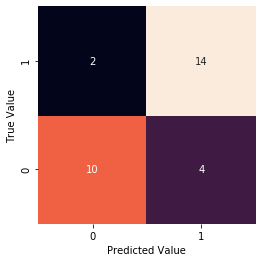

In [20]:

sns.heatmap(conf_mat, square=True, annot=True, cbar = False)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.ylim([0,2])

So in the above case we can see that we have 

Good cases:
* **True Negatives**: 10 cases when the true value was No High BP (high_bp = 0) and we predicted that there will be No High BP 
* **True Positives**: 14 cases when the true value was High BP (high_bp = 1) and we predicted that there will be High BP 

Bad cases:
* **False Positives**: 4 cases when the true value was No High BP (high_bp = 0) and we predicted that there will be High BP (TYPE I ERROR)
* **False Negatives**: 2 cases when the true value was High BP (high_bp = 1) and we predicted that there will be No High BP (TYPE II ERROR)

Now, you can think about the consequence of making both these mistakes (related to Type I and Type II errors), how it might effect a doctor to use these methods in real-world 

# Activity

We will use the breast cancer data available in scikit-learn to predict if an biopsy image is cancerous or not. 

Follow these steps (steps 1 and 2 are done for you)
1. Load the data 
2. Seperate X (input features) and Y (outcome)
3. Split into training data and test data. Use 80% of data for training
    * Verify if the data is appropriately split by checking the number of rows in each of the training and test data. 
4. Learn the GaussianNB classifier to predict cancer or malignant
5. Predict using the test data
6. Provide accuracy score as well as plot the confusion matrix
    * Think about the consequence of False Positives and False Negatives

In [ ]:
# Step 1: Load the data
cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
# Step 2: Seperate X (input features) and Y (outcome)
cancer_X = cancer.data
cancer_Y = cancer.target

In [ ]:
# Split into train and test data
cancer_train_X, cancer_test_X, cancer_train_Y, cancer_test_Y = train_test_split(
                                            cancer_X, cancer_Y,
                                            random_state=20, train_size=.7
)

In [ ]:
# verify the data is split up as intended
print(len(cancer_X), len(cancer_train_X), len(cancer_test_X))

In [ ]:
# Lean the data using the GaussianNB model
model = GaussianNB()
model.fit(cancer_train_X, cancer_train_Y)

In [ ]:
# predict using the test data
cancer_predict_Y = model.predict(cancer_test_X)
cancer_predict_Y

In [ ]:
# determine the accuracy
sklmetrics.accuracy_score(cancer_test_Y, cancer_predict_Y)

In [ ]:
# plot the confusion matrix
cmatrix = sklmetrics.confusion_matrix(cancer_test_Y, cancer_predict_Y)
cmatrix

sns.heatmap(cmatrix, annot=True, fmt='2g')
plt.ylim([0,2])

# Machine Learning: Unsupervised Learning

The example below is borrowed from your textbook. 

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [22]:
# IGNORE HOW THE FOLLOWING CODE WORKS BUT CONCENTRATE ON THE HOW THE DATA LOOKS
# Convert the data into a DataFrame

digits_df = pd.DataFrame(digits.data)
digits_df['Target'] = pd.Series(digits.target)
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

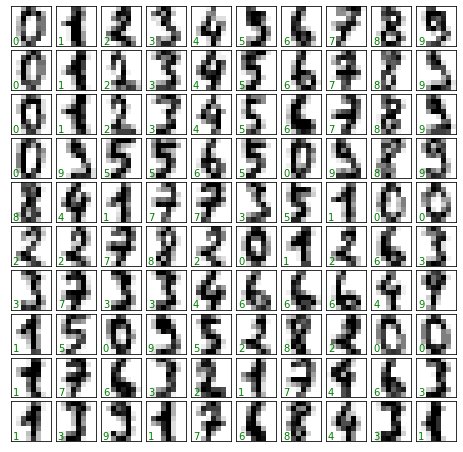

In [23]:
## DO NOT WORRY HOW THE IMAGES ARE LOADED
## CONCENTRATE ON THE IMAGES THAT ARE PRODUCED AS OUTPUT

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

### Splitting the data into X (input characteristics) and Y (outcome)

In [24]:
digit_X = digits.data
digit_Y = digits.target

In [25]:
digit_X[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [26]:
digit_Y[:2]

array([0, 1])

## Dimensionality Reduction

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

In [27]:
from sklearn.decomposition import PCA  
model = PCA(n_components=2)            
model.fit(digit_X)                      
X_2D = model.transform(digit_X)
X_2D[:5]

array([[ -1.25946669,  21.2748826 ],
       [  7.95761154, -20.76869888],
       [  6.99192315,  -9.95598537],
       [-15.90610529,   3.33246397],
       [ 23.30686792,   4.26906222]])

In [28]:
digits_df['PCA1'] = X_2D[:, 0]
digits_df['PCA2'] = X_2D[:, 1]

### Visualizing the dimensionality reduction

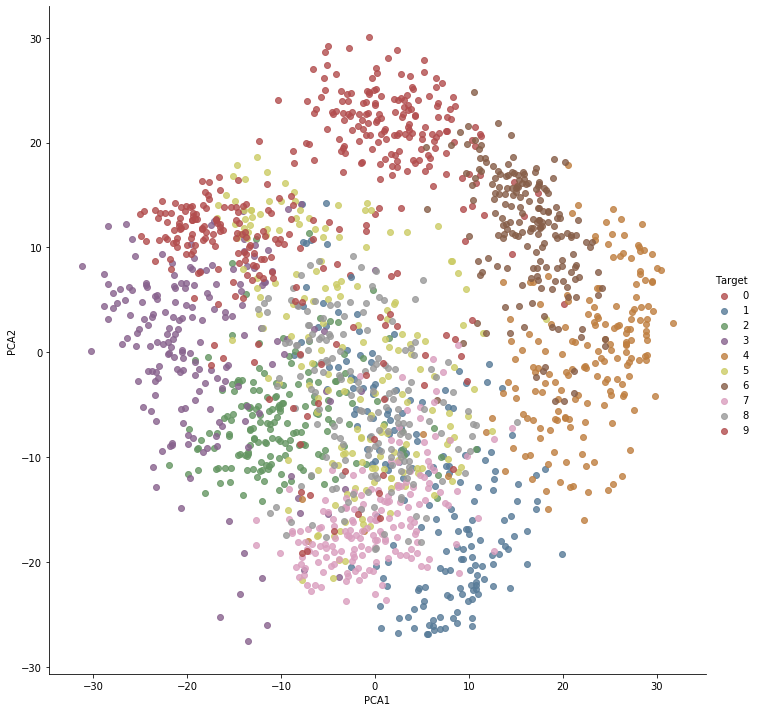

In [29]:
sns.lmplot("PCA1", "PCA2", hue='Target', data=digits_df, fit_reg=False, height=10,
          palette = sns.color_palette("Set1", n_colors=10, desat=.5));

## Unsupervised learning: Iris clustering

Let's next look at applying clustering to the digits data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a powerful clustering method called a Gaussian mixture model (GMM). 
A GMM attempts to model the data as a collection of Gaussian blobs. 

We can fit the Gaussian mixture model as follows:

In [30]:
# 1. Choose the model class
from sklearn.mixture import GaussianMixture      
# 2. Instantiate the model with hyperparameters. 
# We are building 10 clusters (n_components) because we believe they 
# may be 10 clusters, one for each number
model = GaussianMixture(n_components=10,
            covariance_type='full')  
 # 3. Fit to data. Notice y is not specified!
model.fit(digit_X)  
# 4. Determine cluster labels
y_gmm = model.predict(digit_X)        

## Visualizing the clusters and dimensionality reduction

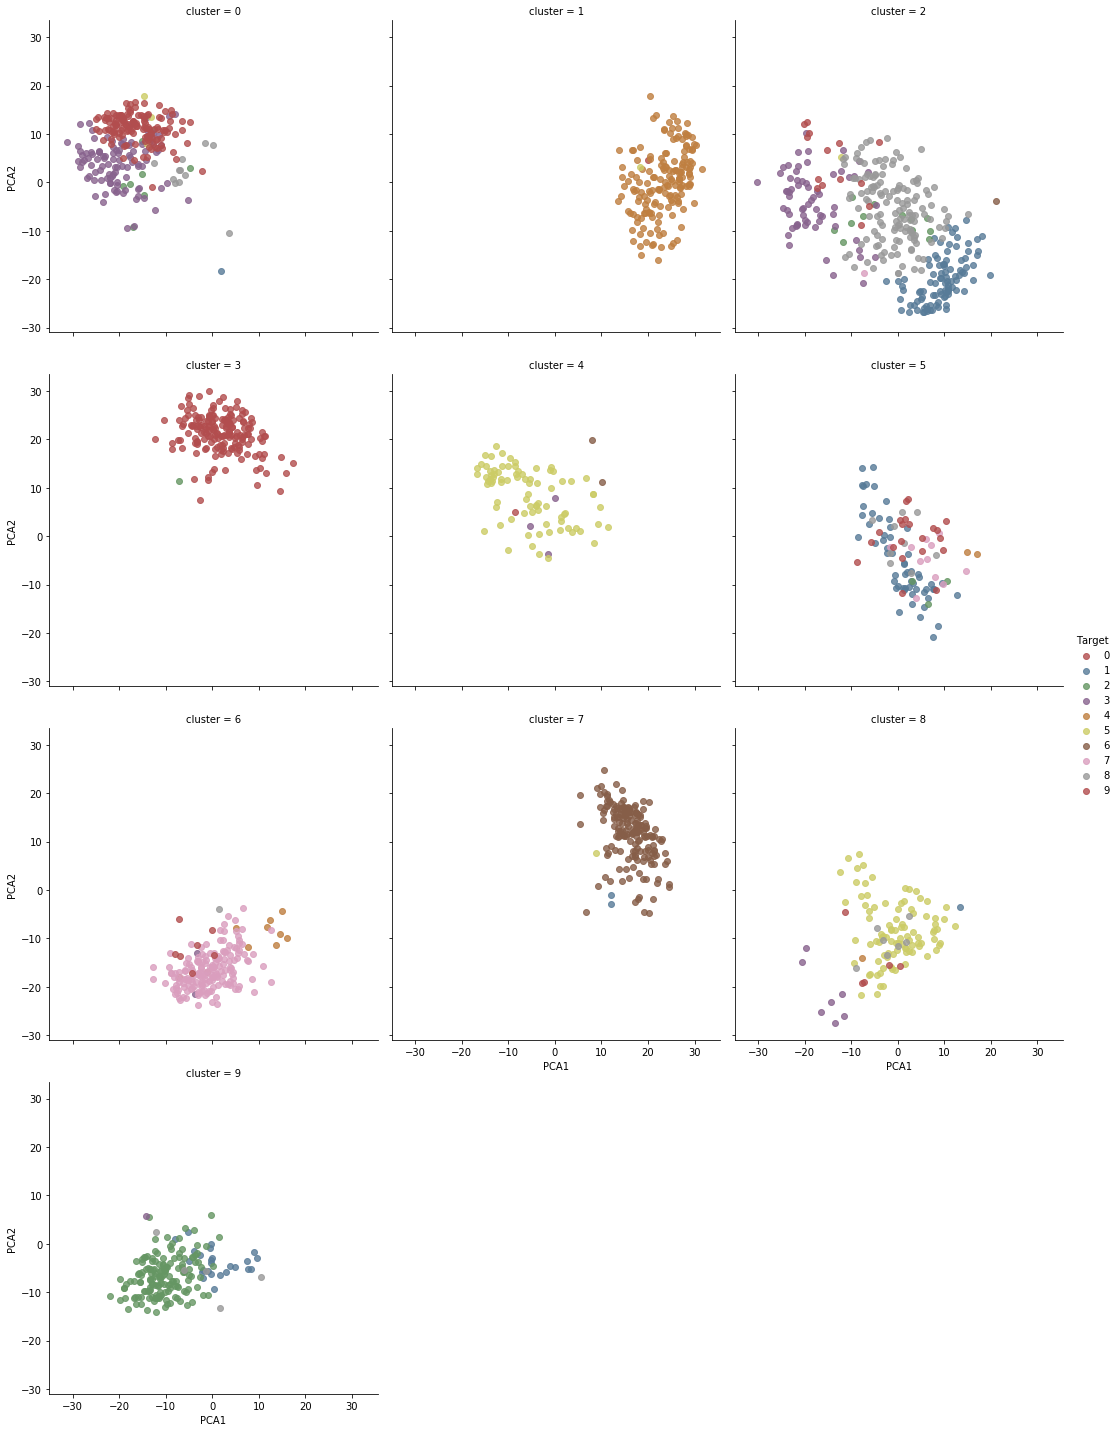

In [31]:
# Again ignore the technical details

digits_df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=digits_df, hue='Target',
           col='cluster', fit_reg=False, col_wrap=3,
          palette = sns.color_palette("Set1", n_colors=10, desat=.5));

** Important Note**

The cluster numbers may not correspond to actual digit they represent. From the image, see if you can find which cluster number corresponds to which number. 